In [145]:
datos <- read_csv("C:/Users/vn.hoyosm/Documents/processed_esti.csv") 


Rows: 1739 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (15): y, w, gender_female, gender_male, gender_transgender, ethnicgrp_as...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [146]:
head(datos)

y,w,gender_female,gender_male,gender_transgender,ethnicgrp_asian,ethnicgrp_black,ethnicgrp_mixed_multiple,ethnicgrp_other,ethnicgrp_white,partners1,postlaunch,msm,age,imd_decile
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,1,0,0,0,1,0,0,0,1,0,27,5
0,0,0,1,0,0,0,0,0,1,0,0,0,19,6
0,1,0,1,0,0,1,0,0,0,0,1,0,26,4
0,0,1,0,0,0,0,0,0,1,1,0,0,20,2
1,1,1,0,0,1,0,0,0,0,0,1,0,24,3
1,1,0,1,0,0,0,0,0,1,0,1,0,24,2


In [84]:
library(dplyr)
library(broom)
library(kableExtra)

In [140]:
# Definir las variables de interés
variables <- c("age", "gender_female", "gender_male", "gender_transgender",
               "ethnicgrp_asian", "ethnicgrp_black", "ethnicgrp_mixed_multiple",
               "ethnicgrp_other", "ethnicgrp_white", "partners1", "msm", "imd_decile")

# Lista para almacenar las estadísticas descriptivas
stats_list <- list()

# Calcular estadísticas descriptivas para cada variable
for (var in variables) {
  stats <- datos %>%
    group_by(w) %>%
    summarise(
      n = n(),
      mean = mean(.data[[var]], na.rm = TRUE),
      sd = sd(.data[[var]], na.rm = TRUE)
    ) %>%
    mutate(variable = var)
  
  stats_list[[var]] <- stats
}

# Convertir la lista de estadísticas a un data frame
stats_df <- bind_rows(stats_list)

# Reorganizar stats_df para tener una variable por fila y por w en columnas
reshaped_stats <- stats_df %>%
  pivot_wider(
    id_cols = variable,
    names_from = w,
    values_from = c(mean, sd)
  ) %>%
  mutate(
    variable = factor(variable, levels = variables)
  ) %>%
  arrange(variable)

# Calcular las diferencias y organizar la tabla final
tabla_final <- reshaped_stats %>%
  mutate(
    Control_mean = mean_0,
    Treatment_mean = mean_1,
    Control_sd = sd_0,
    Treatment_sd = sd_1,
    Diff = mean_1 - mean_0
  ) %>%
  select(variable, Control_mean, Control_sd, Treatment_mean, Treatment_sd, Diff)

# Imprimir la tabla final
print("Table 1: Descriptive Statistics and Balance")
print(tabla_final)


[1] "Table 1: Descriptive Statistics and Balance"
# A tibble: 12 × 6
   variable         Control_mean Control_sd Treatment_mean Treatment_sd     Diff
   <fct>                   <dbl>      <dbl>          <dbl>        <dbl>    <dbl>
 1 age                  23.0         3.59         23.2           3.54    0.111  
 2 gender_female         0.581       0.494         0.587         0.493   0.00672
 3 gender_male           0.418       0.494         0.409         0.492  -0.00876
 4 gender_transgen…      0.00122     0.0350        0.00326       0.0570  0.00203
 5 ethnicgrp_asian       0.0550      0.228         0.0717        0.258   0.0166 
 6 ethnicgrp_black       0.0929      0.290         0.0803        0.272  -0.0126 
 7 ethnicgrp_mixed…      0.0929      0.290         0.0847        0.279  -0.00822
 8 ethnicgrp_other       0.0171      0.130         0.00977       0.0984 -0.00734
 9 ethnicgrp_white       0.742       0.438         0.754         0.431   0.0115 
10 partners1             0.292       0.4

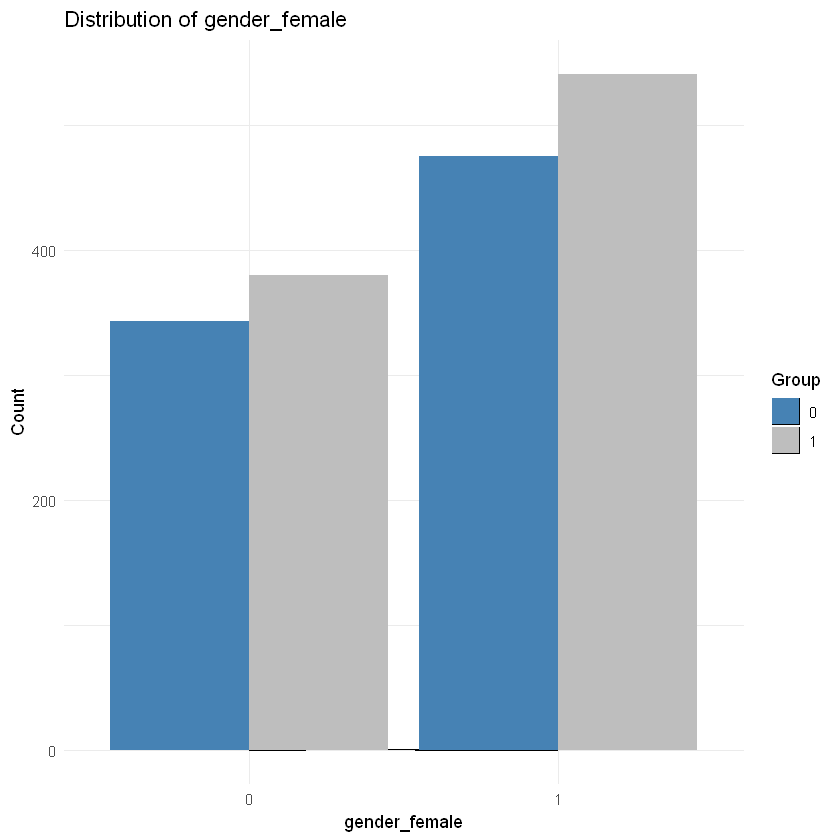

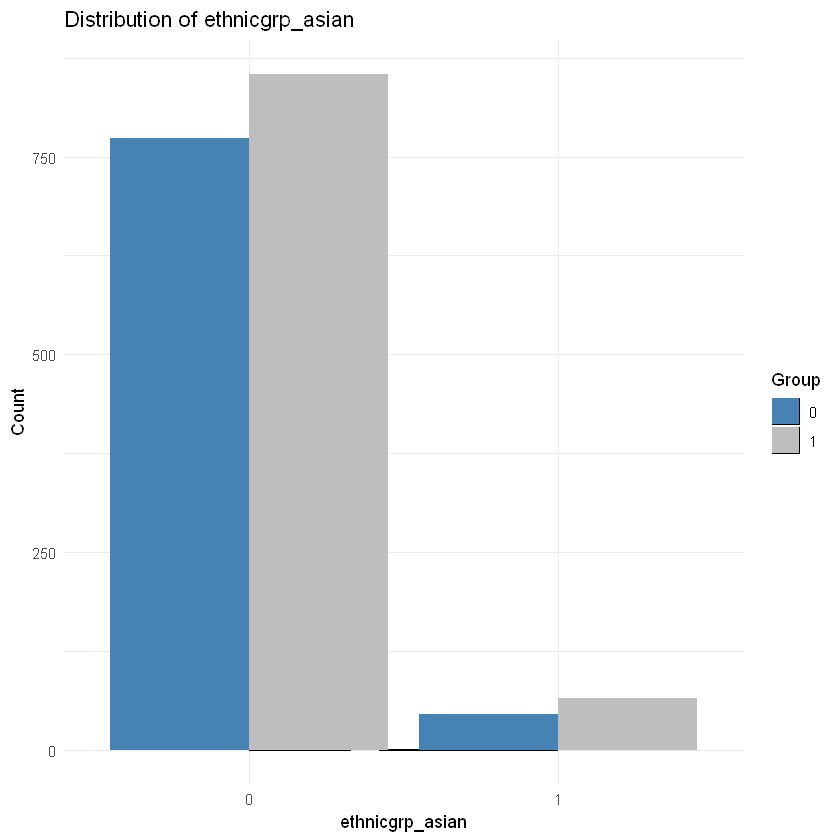

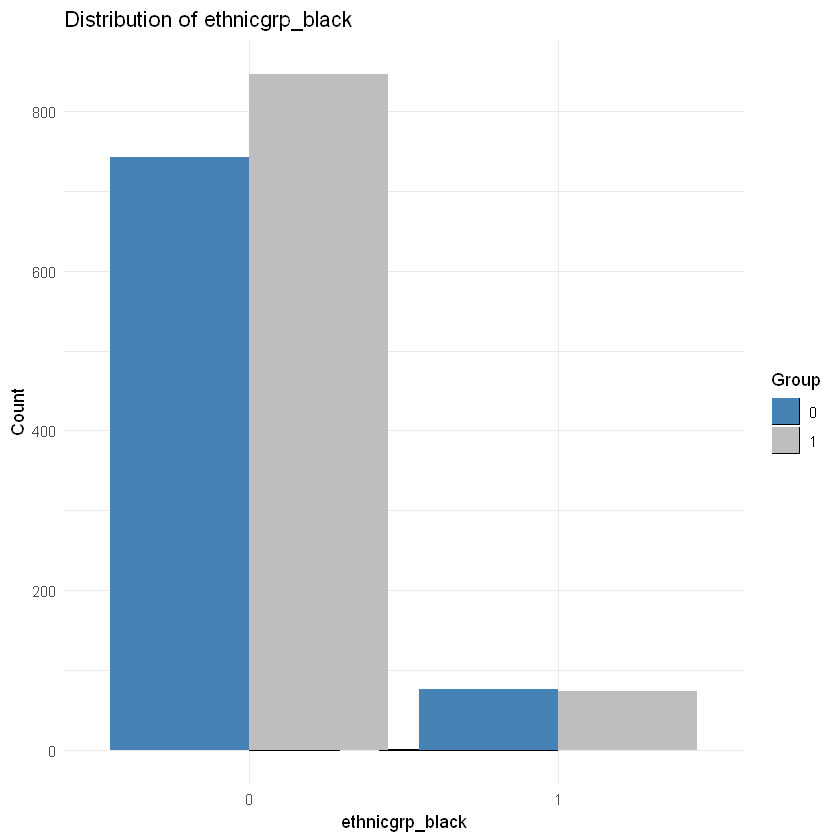

In [164]:
library(ggplot2)

# Variables categóricas de interés
categorical_vars <- c("gender_female", "ethnicgrp_asian", "ethnicgrp_black")
colores <- c("steelblue", "gray") 

# Función para crear gráfico de barras
create_bar_plot <- function(data, var) {
  ggplot(data, aes(x = factor(get(var)), fill = factor(w))) +
      geom_bar(position = "dodge", stat = "count") +
      scale_fill_manual(values = colores) + 
      theme_light() +
    labs(x = var, y = "Count", fill = "Group") +
    ggtitle(paste("Distribution of", var)) +
    theme_minimal()
}

# Crear y mostrar gráficos de barras para cada variable categórica
for (var in categorical_vars) {
  plot <- create_bar_plot(datos, var)
  print(plot)
}


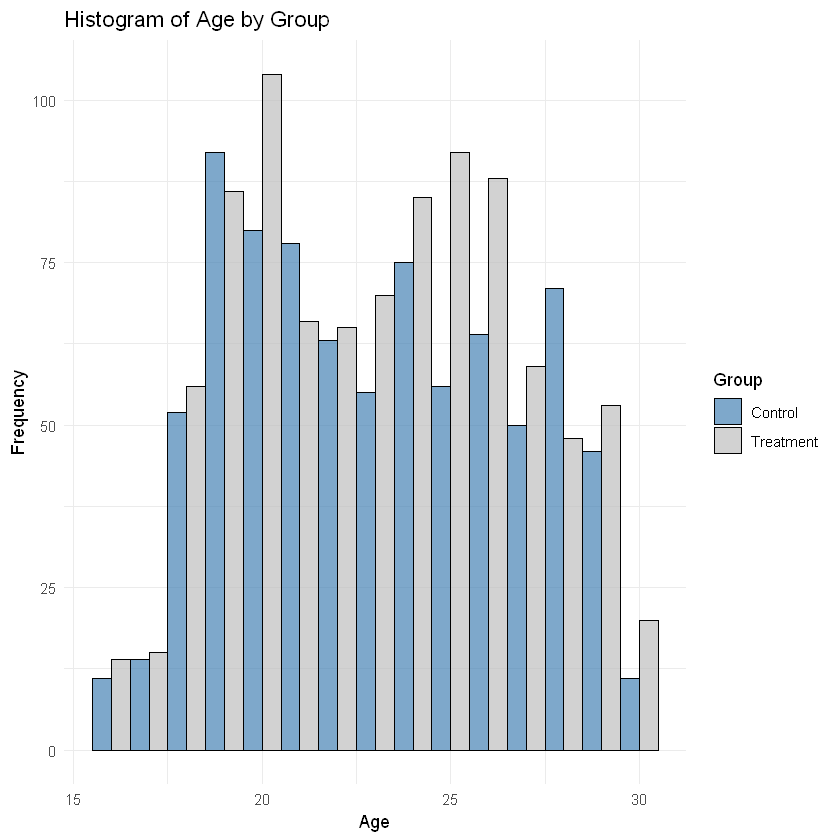

In [176]:
# Crear el histograma de la variable 'age' por grupo (w)
ggplot(datos, aes(x = age, fill = factor(w))) +
  geom_histogram(position = "dodge", binwidth = 1, color = "black", alpha = 0.7) +
  scale_fill_manual(values = c("steelblue", "gray"), 
                    name = "Group",
                    labels = c("Control", "Treatment")) +
  labs(title = "Histogram of Age by Group",
       x = "Age",
       y = "Frequency") +
  theme_minimal()


In [220]:
# Realizar la regresión lineal
model <- lm(y ~ w, data = datos)
nocontrol.est <- summary(model)$coef["w",1]
CI1upper <-confint(model)[2,2]
CI1low <-confint(model)[2,1]

summary(model)


Call:
lm(formula = y ~ w, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4767 -0.4767 -0.2115  0.5233  0.7885 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.21149    0.01605   13.17   <2e-16 ***
w            0.26516    0.02206   12.02   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4591 on 1737 degrees of freedom
Multiple R-squared:  0.0768,	Adjusted R-squared:  0.07627 
F-statistic: 144.5 on 1 and 1737 DF,  p-value: < 2.2e-16


Interpretation: There is a significant (p<0.05) and positive effect of the treatment on the outcome. The probability that Y is equal to 1 increases by 26.52 percentage points when w=1, compared to w=0. However, there is omitted variable bias because only outocme was regressed with treatment

In [223]:
formula <- y ~ w + age + gender_female  + ethnicgrp_black + gender_transgender + msm
model <- lm(formula, data = datos)
control.est <- summary(model)$coef[2,1]
CI2upper <-confint(model)[2,2]
CI2low <-confint(model)[2,1]
summary(model)


Call:
lm(formula = formula, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6280 -0.3638 -0.1853  0.4874  0.9203 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.216998   0.075399  -2.878 0.004051 ** 
w                   0.261294   0.021816  11.977  < 2e-16 ***
age                 0.016486   0.003092   5.333  1.1e-07 ***
gender_female       0.089087   0.024942   3.572 0.000364 ***
ethnicgrp_black    -0.066363   0.038931  -1.705 0.088441 .  
gender_transgender  0.424825   0.227945   1.864 0.062530 .  
msm                 0.017699   0.036669   0.483 0.629402    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4537 on 1732 degrees of freedom
Multiple R-squared:  0.1012,	Adjusted R-squared:  0.09807 
F-statistic:  32.5 on 6 and 1732 DF,  p-value: < 2.2e-16


Interpretation: There is a significant (p<0.01) and positive effect of the treatment on the outcome. The probability that Y is equal to 1 increases by 26.13 percentage points when w=1, compared to w=0. Likewise, the other variables that were significant are age and female with a significance level of 0.01.

Use the Double Lasso Method to estimate Y ~ T + X. Please show a clear table output and interpret the results.


In [235]:
# Cargar las librerías necesarias
library(glmnet)

# Definir las variables
T <- datos$w
Y <- datos$y
X <- model.matrix(formula, data = datos)[,-1]

# Ajustar el modelo Lasso con validación cruzada
cv.lasso <- cv.glmnet(as.matrix(X), T, alpha = 1)

# Obtener los coeficientes del modelo Lasso
lasso_coefs <- coef(cv.lasso, s = "lambda.min")

# Seleccionar las covariables no nulas
selected_covariates <- rownames(lasso_coefs)[lasso_coefs[, 1] != 0]
selected_covariates <- selected_covariates[selected_covariates != "(Intercept)"]

# Comprobar si hay covariables seleccionadas
if (length(selected_covariates) > 0) {
  # Crear la fórmula del modelo
  model_formula <- as.formula(paste("y ~", paste(selected_covariates, collapse = " + ")))
} else {
  # Si no hay covariables seleccionadas, usar solo el intercepto
  model_formula <- as.formula("y ~ 1")
}

# Ajustar el modelo lineal
modelo1 <- lm(model_formula, data = datos)
lasso.est <- summary(modelo1)$coef[2,1]
CI3upper <-confint(modelo1)[2,2]
CI3low <-confint(modelo1)[2,1]

# Mostrar el resumen del modelo
summary(modelo1)



Call:
lm(formula = model_formula, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4767 -0.4767 -0.2115  0.5233  0.7885 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.21149    0.01605   13.17   <2e-16 ***
w            0.26516    0.02206   12.02   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4591 on 1737 degrees of freedom
Multiple R-squared:  0.0768,	Adjusted R-squared:  0.07627 
F-statistic: 144.5 on 1 and 1737 DF,  p-value: < 2.2e-16


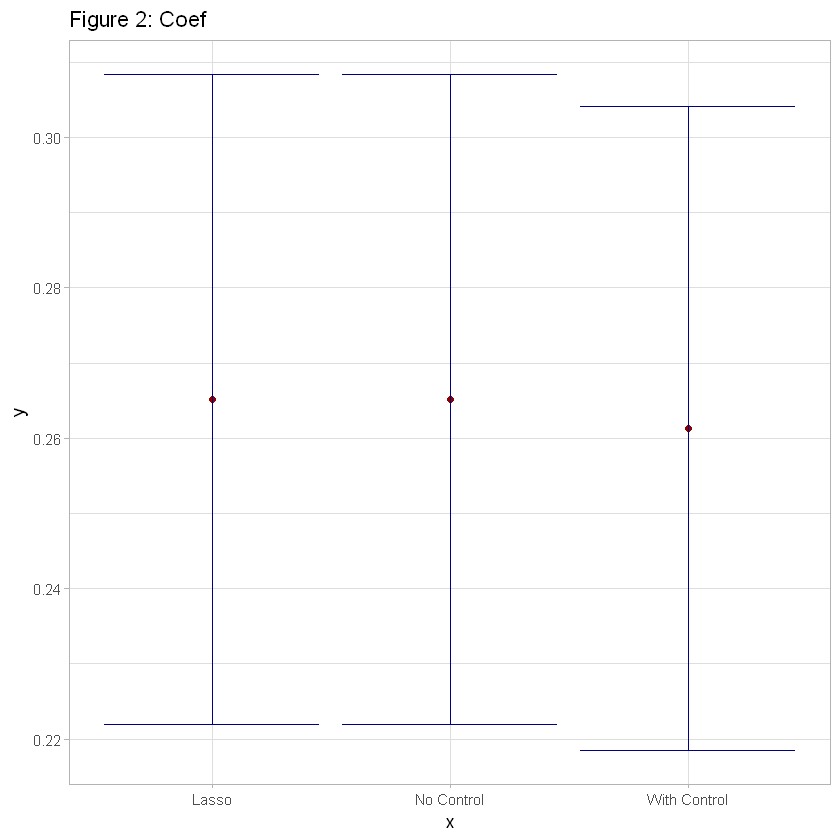

In [236]:
CIdf <- data.frame(x = c('No Control','With Control','Lasso'),
                         y = c(nocontrol.est,control.est, lasso.est),
                         lower = c(CI1low,CI2low,CI3low),
                         upper = c(CI1upper,CI2upper, CI3upper))
ggplot(CIdf, aes(x, y)) +
  geom_point(color = "darkred") +  # Puntos rojos
  geom_errorbar(aes(ymin = lower, ymax = upper), color = "navyblue") +  # Borde de los intervalos de error azules
  ggtitle("Figure 2: Coef") +
  theme_light()